In [28]:
import matplotlib.pyplot as plt
import os
import numpy as np
import json
import pyfar as pf
%matplotlib inline

In [29]:
OUT_DIR = os.path.join(os.getcwd(),"out")

SRC_DIR = os.path.join("C:\\Users\\jotag\\OneDrive - Universita' degli Studi della Campania Luigi Vanvitelli\\jasapaper")

### figure formatting

In [30]:
font={
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": "Helvetica",
    "font.size": 12,
}



plt.rcParams.update(font)

def create_fig():
    figure,ax = plt.subplots(figsize=(3,2))
    plt.grid()
    return figure, ax

def create_fig2():
    figure,ax = plt.subplots(figsize=(5,3))
    plt.grid()
    return figure, ax

def export_fig(fig, filename,out_dir=OUT_DIR, fformat=".pdf"):
    fig.savefig(os.path.join(out_dir,filename+fformat), bbox_inches='tight')

tlabel="run-time\,[s]"
mlabel="peak memory\,[MB]"
mlegend=["baking", "exchange","collection","baseline"]
tlegend=["baking", "exchange","collection","total", "baseline"]

In [31]:
# get file from
with open(os.path.join(SRC_DIR,"urban_canyon_with_mem_.json")) as json_file:
    dat = json.load(json_file)

## time step

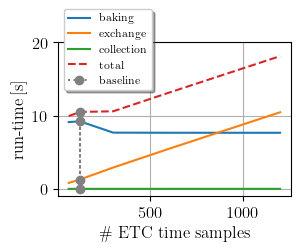

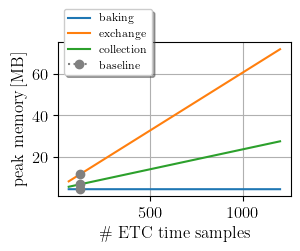

In [32]:
t = np.array(dat["time_step"]["t"])[:,1:]
d = np.array(dat["time_step"]["data"])
m = np.array(dat["time_step"]["mem"])[:,1:,1]/1024**2/1.048576
n = 1.2/d

i = np.argwhere(n==120)[0]

ssum = np.sum(t,axis=1)

fn,a=create_fig()
plt.plot(n,t)
plt.plot(n,ssum,'--')
plt.plot(n[i]*np.ones((len(t.T[:,i])+1)),np.append(t.T[:,i],ssum[i]),'o:', color='gray')
plt.xlabel("\\# ETC time samples")
plt.ylabel(tlabel)
plt.legend(tlegend,fontsize=8,loc="upper left",bbox_to_anchor=(0, 1.25),shadow=True)
plt.ylim([-1,20])
plt.show()

export_fig(fn,filename="time_samples_rt")

# fm,a=create_fig()
# plt.plot(d*1000,m)
# plt.xlabel("$$\\Delta t \\quad [\\mathrm{ms}]$$")
# plt.ylabel(mlabel)
# plt.legend(mlegend,fontsize=8)
# plt.show()

fmn,a=create_fig()
plt.plot(n,m)
plt.plot(n[i]*np.ones_like(m.T[:,i]),m.T[:,i],'o:', color='gray')
plt.xlabel("\\# ETC time samples")
plt.ylabel(mlabel)
plt.legend(mlegend,fontsize=8,loc="upper left",bbox_to_anchor=(0, 1.25),shadow=True)
plt.show()

export_fig(fmn,filename="time_samples_mem")

## BRDF resolution

C:\Users\jotag\AppData\Local\Temp\ipykernel_34808\2901954890.py:6: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.gaussian.'
  samples = pf.samplings.sph_gaussian(dd)
c:\Users\jotag\Documents\dev\sparapy\.venv\Lib\site-packages\pyfar\samplings\samplings.py:344: PyfarDeprecationWarning: 'This function will be changed in pyfar 0.8.0 to init(x, y, z).'
  sampling = pyfar.Coordinates(
c:\Users\jotag\Documents\dev\sparapy\.venv\Lib\site-packages\pyfar\classes\coordinates.py:276: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  self.sh_order = sh_order


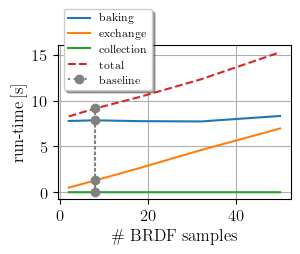

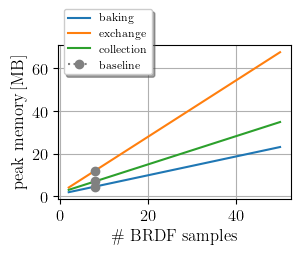

In [33]:
t = np.array(dat["brdf_resolution"]["t"])[:,1:]
d = np.array(dat["brdf_resolution"]["data"])
m = np.array(dat["brdf_resolution"]["mem"])[:,1:,1]/1024**2
n=[]
for dd in d:
    samples = pf.samplings.sph_gaussian(dd)
    n.append(samples[np.where((samples.elevation*180/np.pi >= 0))].cshape[0])

n=np.array(n)
i = np.argwhere(n==8)[0]
# f,a=create_fig()
# plt.plot(d[1:],t[1:])
# plt.xlabel("$$\\Delta \\psi \\quad [^{\\circ}]$$")
# plt.ylabel(tlabel)
# plt.legend(tlegend,fontsize=8)
# plt.show()

ssum = np.sum(t,axis=1)

fn,a=create_fig()
plt.plot(n,t)
plt.plot(n,np.sum(t,axis=1),'--')
plt.plot(n[i]*np.ones((len(t.T[:,i])+1)),np.append(t.T[:,i],ssum[i]),'o:', color='gray')
plt.xlabel("\\# BRDF samples")
plt.ylabel(tlabel)
plt.legend(tlegend,fontsize=8,loc="upper left",bbox_to_anchor=(0, 1.27),shadow=True)
plt.show()

export_fig(fn,filename="BRDF_samples_rt")

# fm,a=create_fig()
# plt.plot(d,m)
# plt.xlabel("$$\\Delta \\psi \\quad [^{\\circ}]$$")
# plt.ylabel(mlabel)
# plt.legend(mlegend,fontsize=8)
# plt.show()

fmn,a=create_fig()
plt.plot(n,m)
plt.plot(n[i]*np.ones_like(m.T[:,i]),m.T[:,i],'o:', color='gray')
plt.xlabel("\\# BRDF samples")
plt.ylabel(mlabel)
plt.legend(mlegend,fontsize=8,loc="upper left",bbox_to_anchor=(0, 1.27),shadow=True)
plt.show()

export_fig(fmn,filename="BRDF_samples_mem")


## reflection order

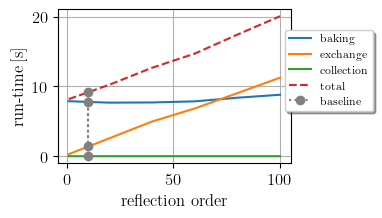

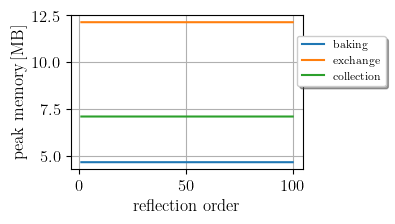

In [34]:
t = np.array(dat["reflection_order"]["t"])[:,1:]
d = np.array(dat["reflection_order"]["data"])
m = np.array(dat["reflection_order"]["mem"])[:,1:,1]/1024**2

ssum = np.sum(t,axis=1)

tt = (10*(t.T[:,1]-t.T[:,0])/19 + t.T[:,0])
ssum = (10*(ssum[1]-ssum[0])/19 + ssum[0] )

f,a=create_fig()
plt.plot(d,t)
plt.plot(d,np.sum(t,axis=1),'--')
plt.plot(10*np.ones((len(t.T[:,0])+1)),np.append(tt , ssum),'o:', color='gray')
plt.xlabel("reflection order")
plt.ylabel(tlabel)
plt.legend(tlegend,fontsize=8,loc="upper left",bbox_to_anchor=(.95, .9),shadow=True)

plt.show()

export_fig(f,filename="order_rt")

fm,a=create_fig()
plt.plot(d,m)
#plt.plot(d[i]*np.ones_like(m.T[:,i]),m.T[:,i],'o:', color='gray')
plt.xlabel("reflection order")
plt.ylabel(mlabel)
plt.legend(mlegend,fontsize=8,loc="upper left",bbox_to_anchor=(.95, .9),shadow=True)
plt.show()

export_fig(fm,filename="order_mem")

## patch size

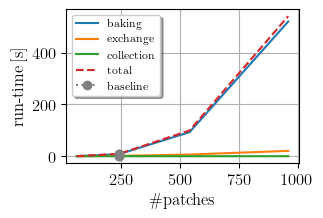

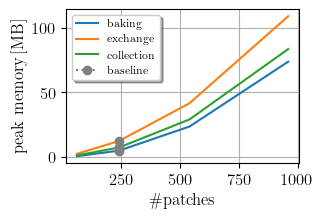

In [35]:
t = np.array(dat["patch_size"]["t"])[:,1:]
d = np.array(dat["patch_size"]["data"])
m = np.array(dat["patch_size"]["mem"])[:,1:,1]/1024**2
n = (6*2+12)*90/d**2

n=np.array(n)
ssum = np.sum(t,axis=1)
i = np.argwhere(n==240)[0]
# f,a=create_fig()
# plt.semilogx(d,t)
# plt.xlabel("$$\\Delta S$$")
# plt.ylabel(tlabel)
# plt.legend(tlegend,fontsize=8)
# plt.show()

fn,a=create_fig()
plt.plot(n,t)
plt.plot(n,np.sum(t,axis=1),'--')
plt.plot(n[i]*np.ones((len(t.T[:,i])+1)),np.append(t.T[:,i],ssum[i]),'o:', color='gray')
plt.xlabel("$$\\mathrm{\\#patches}$$")
plt.ylabel(tlabel)
plt.legend(tlegend,fontsize=8,shadow=True)
plt.show()

export_fig(fn,filename="patches_rt")

# fm,a=create_fig()
# plt.plot(d,m)
# plt.xlabel("$$\\Delta S$$")
# plt.ylabel(mlabel)
# plt.legend(mlegend,fontsize=8)
# plt.show()

fm,a=create_fig()
plt.plot(n,m)
plt.plot(n[i]*np.ones_like(m.T[:,i]),m.T[:,i],'o:', color='gray')
plt.xlabel("$$\\mathrm{\\#patches}$$")
plt.ylabel(mlabel)
plt.legend(mlegend,fontsize=8,shadow=True)
plt.show()

export_fig(fm,filename="patches_mem")

## proof of concept

In [36]:
#etcs = pf.io.read(os.path.join(SRC_DIR,"proof_etcs_.far"))
etcs = pf.io.read(os.path.join(os.getcwd(),"out","proof_retro_etcs_psize3.far"))

In [37]:
custom=etcs["custom_etc"][0]
diff = etcs["diffuse_etc"][0]

freq=etcs["freqs"]

In [38]:
import csv

f=[]

ffile = os.path.join(os.getcwd(),"raven_streetcanyon_retro.csv")
with open(ffile, mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        f.append(lines)

  g = np.array(f,dtype=np.float64)

ffreq=g[0]
ttime = g[1:,0]
data = g[1:,1:].T/(4*np.pi)

In [39]:
ddata=np.empty((freq.shape[0],data.shape[-1]))
for i,f in enumerate(freq):
    ddata[i] = data[np.where(ffreq==f)[0]]
raven = pf.TimeData(data=ddata,times=ttime)

C:\Users\jotag\AppData\Local\Temp\ipykernel_34808\1043825985.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axin.set_xticklabels([""])
C:\Users\jotag\AppData\Local\Temp\ipykernel_34808\1043825985.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axin.set_yticklabels([""])


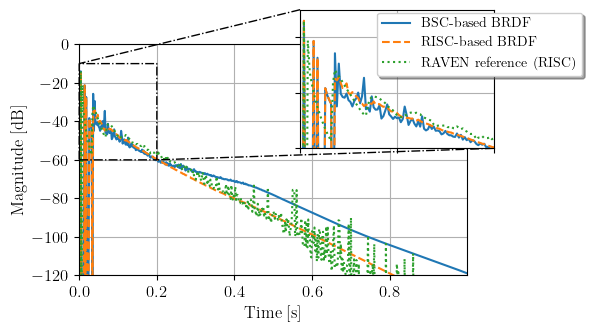

In [ ]:

f,a=create_fig2()
pf.plot.time(custom[-2], dB=True, log_prefix=10,
             label=["BSC-based BRDF"],
             linestyle="-")
pf.plot.time(diff[-2], dB=True, log_prefix=10,
             label=["RISC-based BRDF"],
             linestyle="--")
pf.plot.time(raven[-2], dB=True, log_prefix=10,
             label=["RAVEN reference (RISC)"],
             linestyle=":")
plt.legend(fontsize=10,loc="upper right",bbox_to_anchor=(1.07, .5 ),shadow=True)
plt.xlabel("Time  [s]")
plt.ylabel("Magnitude [dB]")
plt.ylim([-120,0])
export_fig(f,filename="etcs_4k")



axin = a.inset_axes([0.57, 0.55, 0.5, 0.6])


axin.grid()

pf.plot.time(custom[-2], dB=True, log_prefix=10,
             label=["BSC-based BRDF"],
             linestyle="-",ax=axin)
pf.plot.time(diff[-2], dB=True, log_prefix=10,
             label=["RISC-based BRDF"],
             linestyle="--",ax=axin)
pf.plot.time(raven[-2], dB=True, log_prefix=10,
             label=["RAVEN reference (RISC)"],
             linestyle=":",ax=axin)
axin.set_xlim(0,.2)
axin.set_ylim(-60,-10)
axin.set_xlabel("")
axin.set_ylabel("")
axin.set_xticklabels([""])
axin.set_yticklabels([""])

a.indicate_inset_zoom(axin,edgecolor='k', linestyle='-.', alpha=1)

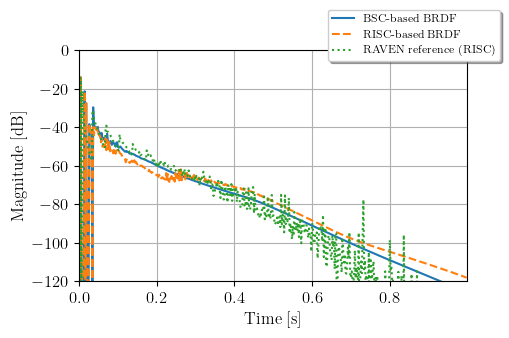

In [41]:
f,a=create_fig2()
pf.plot.time(custom[0], dB=True, log_prefix=10,
             label=["BSC-based BRDF"],
             linestyle="-")
pf.plot.time(diff[0], dB=True, log_prefix=10,
             label=["RISC-based BRDF"],
             linestyle="--")
pf.plot.time(raven[0], dB=True, log_prefix=10,
             label=["RAVEN reference (RISC)"],
             linestyle=":")
plt.legend(fontsize=8,loc="upper right",bbox_to_anchor=(1.1, 1.2),shadow=True)
plt.xlabel("Time  [s]")
plt.ylabel("Magnitude [dB]")
plt.ylim([-120,0])

export_fig(f,filename="etcs_125")

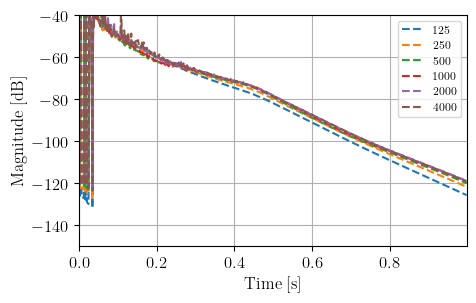

In [42]:
f,a=create_fig2()
# pf.plot.time(custom[1], dB=True, log_prefix=10,
#              label=["custom @ 500Hz"],
#              linestyle="-")
pf.plot.time(custom,dB=True, log_prefix=10,
             label=["125","250","500","1000","2000","4000"],
             linestyle="--")
# pf.plot.time(raven[1], dB=True, log_prefix=10,
#              label=["RAVEN @ 500Hz"],
#              linestyle=":")
plt.legend(fontsize=8)
plt.xlabel("Time  [s]")
plt.ylabel("Magnitude [dB]")
plt.ylim([-150,-40])

export_fig(f,filename="etcs_500")